# Explore here

### Paso 1. Lectura del conjunto de datos

In [1]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.29
1,2022-09-04 17:10:08.079328,53.80
2,2022-09-05 17:10:08.079328,58.14
3,2022-09-06 17:10:08.079328,64.53
4,2022-09-07 17:10:08.079328,66.01


In [2]:
import pandas as pd

total_data["date"] = pd.to_datetime(total_data["date"])
total_data["just_date"] = total_data["date"].dt.date
total_data = total_data.set_index("just_date")
ts = total_data["sales"]
ts.head()


just_date
2022-09-03    55.29
2022-09-04    53.80
2022-09-05    58.14
2022-09-06    64.53
2022-09-07    66.01
Name: sales, dtype: float64

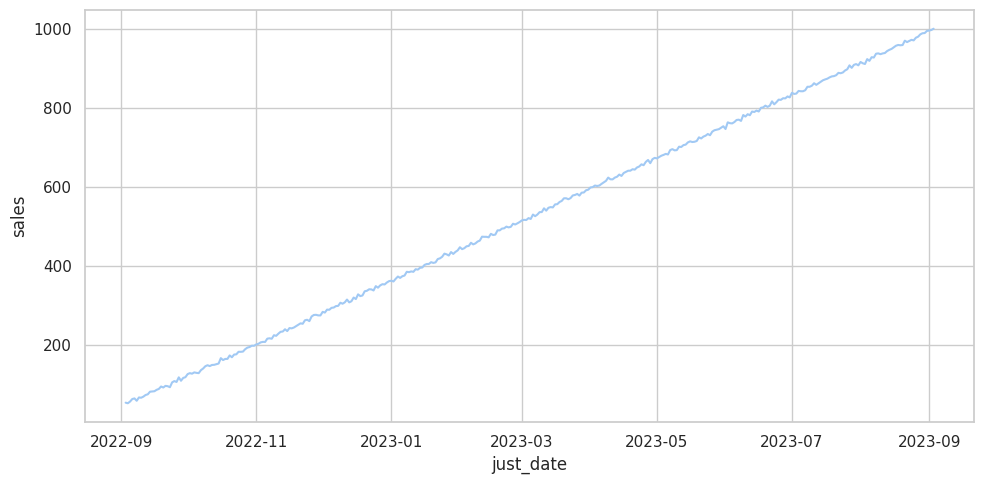

In [3]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()


    ¿Cuál es el tensor de la serie temporal?
    ¿Cuál es la tendencia?
    ¿Es estacionaria?
    ¿Existe variabilidad o presencia de ruido?

    Nota: Un tensor en una serie temporal es la unidad de tiempo mínima para la cual hay datos. Puede ser cada segundo, minuto, hora, día, semana, mes...

### Paso 2. Análisis de una serie temporal

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 12)
decomposition

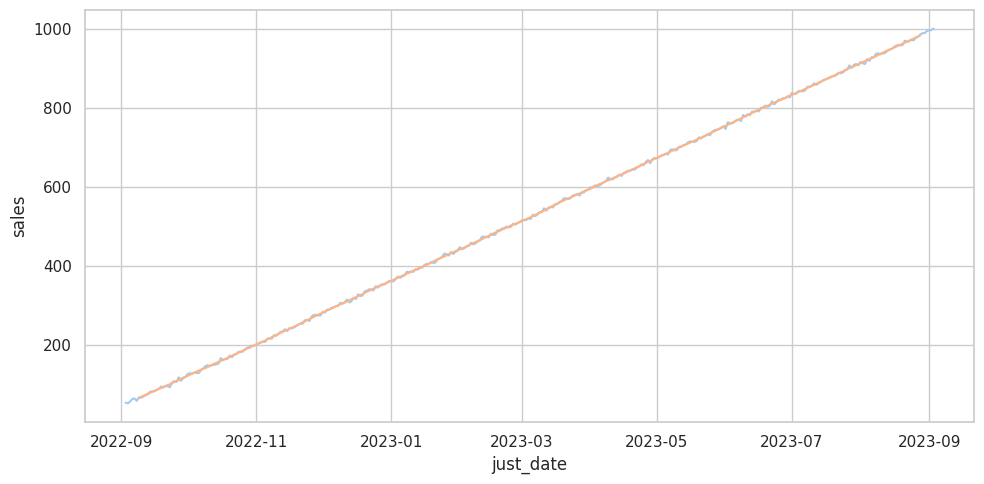

In [5]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

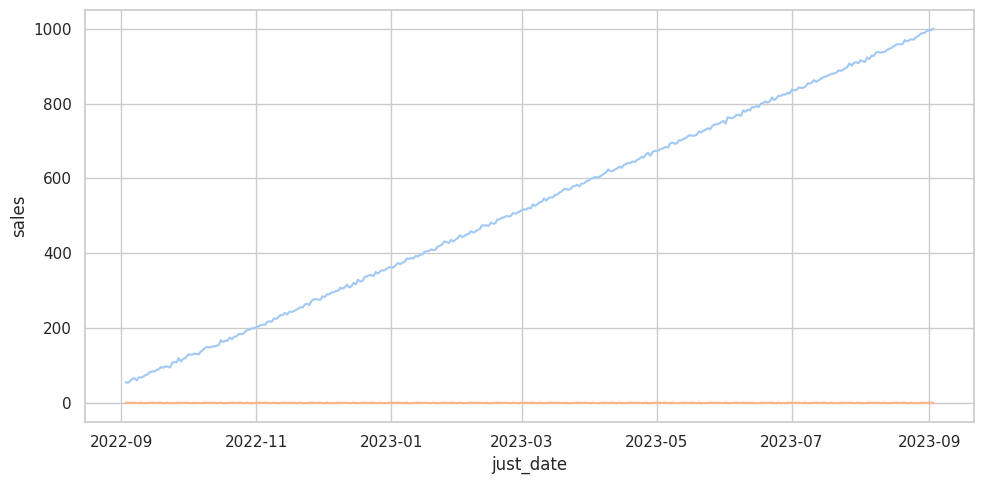

In [6]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.55
p-value                          0.99
#Lags Used                      13.00
Number of Observations Used    352.00
Critical Value (1%)             -3.45
Critical Value (5%)             -2.87
Critical Value (10%)            -2.57
dtype: float64

Al ser p_value + 0.05 rechazamos H0 y por lo tanto confirmamos la no estacionalidad de los datos.

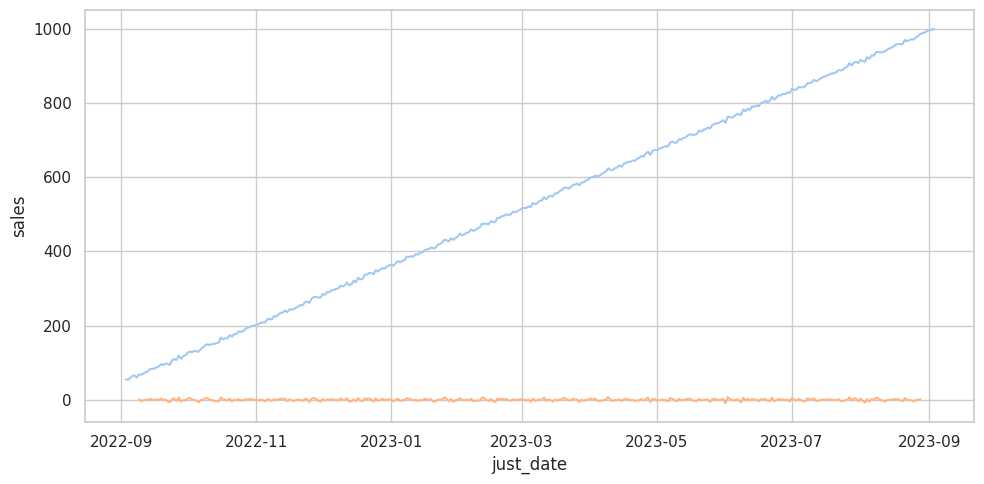

In [8]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

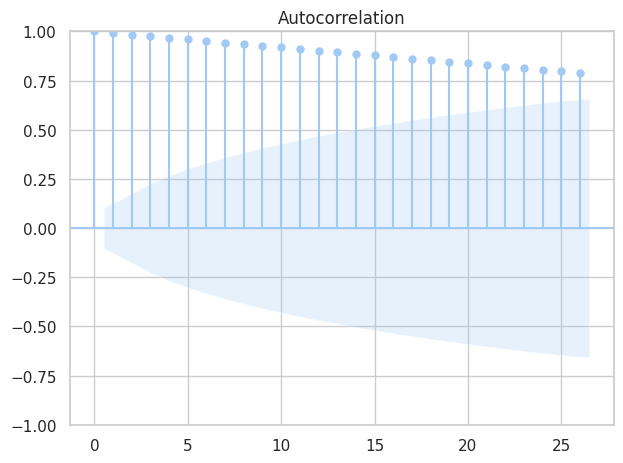

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

Paso 3: Entrena un ARIMA

Utiliza los datos de entrenamiento para encontrar la mejor parametrización de tu modelo ARIMA.

In [10]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.43e+00
p-value                        5.21e-16
#Lags Used                     1.20e+01
Number of Observations Used    3.52e+02
Critical Value (1%)           -3.45e+00
Critical Value (5%)           -2.87e+00
Critical Value (10%)          -2.57e+00
dtype: float64

In [11]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.118, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.80 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.44 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.08 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.41 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.435, Time=1.27 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.02 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.20 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Wed, 13 Aug 2025   AIC                           1839.553
Time:                        18:32:39   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Paso 4: Predice con el conjunto de test

Ahora utiliza el modelo entrenado con el conjunto de prueba y compara los puntos con los reales. Mide el rendimiento de la serie temporal.

In [13]:
forecast = model.predict(10)
forecast

2023-09-04    1.68
2023-09-05    2.67
2023-09-06    2.59
2023-09-07    2.60
2023-09-08    2.60
2023-09-09    2.60
2023-09-10    2.60
2023-09-11    2.60
2023-09-12    2.60
2023-09-13    2.60
Freq: D, dtype: float64

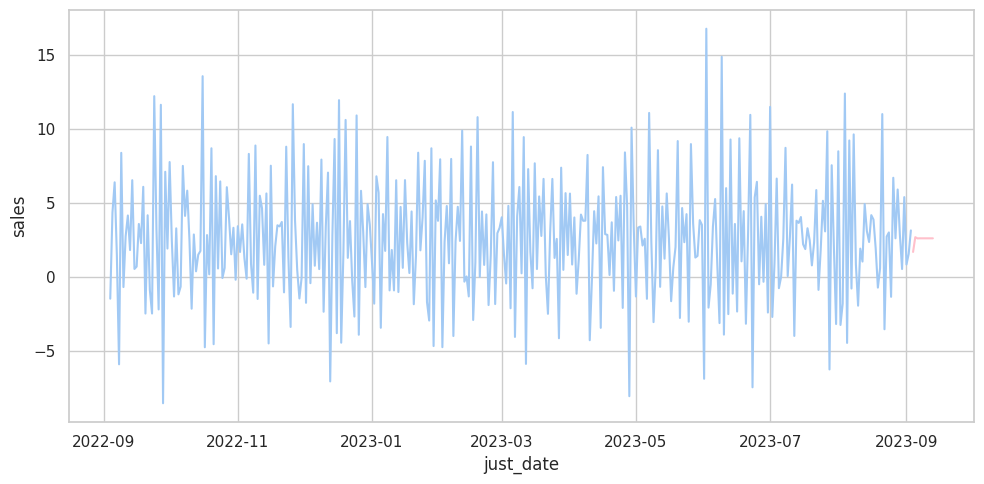

In [17]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "pink")

plt.tight_layout()

plt.show()